In [1]:
# %load ../../firstcell.py
%reload_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=150

### Cleansing data to match the countries of the three datasets

In [2]:
pop_df=pd.read_csv('Population_filtered.csv',index_col=0)
gdp_df=pd.read_csv('GDP_filtered.csv',index_col=0)
trade_df = pd.read_csv("../trade_matrix_clean.csv",index_col=0)

#### The intersection of importers and exporters has already the 184 importer countries, then I'll just use the list of exporter countries. This was necessary for isn't always the case, e.g.,
importer - exporter  
A-B  
A-B  
C-A  
C-A  

intersection={A} $\neq$ {A,C} = unique_importer

In [20]:
print('Number of countries in the exporter column:',len(trade_df['exporter'].unique()))
print('Number of countries in the importer column:',len(trade_df['importer'].unique()))
print('Number of countries in the intersection of importer y exporter columns:',len(set(trade_df['exporter'].unique()).intersection(trade_df['importer'].unique())))
#Verifing that they have the same countries:
countries_ex_im_inter=np.array(list(set(trade_df['exporter']).intersection(trade_df['importer'].unique())),dtype='object')
countries_importers=trade_df['importer'].unique()
print("Total of equal countries in the intersection of importer and intesection :",np.equal(np.sort(countries_ex_im_inter), np.sort(countries_importers)).sum() )

Number of countries in the exporter column: 244
Number of countries in the importer column: 184
Number of countries in the intersection of importer y exporter columns: 184
Equal countries in the intersection of importer and intesection : 184


####  Exact same countries from gdp and pop, I'll use pop

In [21]:
pop_countries=pop_df['country.value'].unique()
gdp_countries=gdp_df['country.value'].unique()

gdp_pop_inter=np.array(list(set(pop_countries).intersection(set(gdp_countries))),dtype='object')
print("Number of countries in gdp:",len(gdp_countries))
print("Total of equal countries in gdp intersected with the intersection of gdp y pop:",np.equal(np.sort(gdp_pop_inter),np.sort(gdp_countries)).sum())

Number of countries in gdp: 217
Total of equal countries in gdp intersected with the intersection of gdp y pop: 217


#### Get set of equal countries form both gdp and trade datasets

In [ ]:
trade_countries=trade_df['exporter'].unique()
intersc=set(trade_countries).intersection(pop_countries)

In [72]:
print('Number countries in trade export:', len(trade_countries))
print('Number countries in gdp:',len(gdp_countries))
print('Number of countries in intersection of gdp and trade export:',len(intersc))

Number countries in trade export: 244
Number countries in gdp: 217
Number of countries in intersection of gdp and trade export: 181


In [74]:
d_trade_intersc=set(trade_countries)-intersc
d_gdp_intersc=set(gdp_countries)-intersc
print('leftover countries of gdp data:',len(d_gdp_intersc))
print('leftover countries of trade data:',len(d_trade_intersc))

leftover countries of gdp data: 36
leftover countries of trade data: 63


In [75]:
leftover=pd.DataFrame(data=[d_trade_intersc,d_gdp_intersc]).transpose()

In [101]:
leftover.rename({0:'trade - intersection',1:'gdp - intersection'},axis=1,inplace=True)
leftover.sort_values(by=['trade - intersection','gdp - intersection'],inplace=True)
leftover.reset_index(drop=True,inplace=True)
leftover.head(60)

,trade - intersection,gdp - intersection
0,Anguilla,Tanzania
1,Bahamas,None
2,Belgium-Luxembourg,None
3,Bolivia (Plurinational State of),None
4,Bouvet Island,Kosovo
5,British Indian Ocean Territory,Sint Maarten (Dutch part)
6,"China, Hong Kong SAR",None
7,"China, Macao SAR","Congo, Rep."
8,"China, Taiwan Province of",Virgin Islands (U.S.)
9,"China, mainland",None


#### Because the calculation of antifragility values considers the fact that there are more exporter countries than importer countries, I'll use the intersection set of exporter and gdp countries 

In [6]:
concurrent_trade_df=trade_df[trade_df['exporter'].isin(intersc)]
concurrent_gdp_df=gdp_df[gdp_df['country.value'].isin(intersc)]
concurrent_pop_df=pop_df[pop_df['country.value'].isin(intersc)]

In [116]:
oldnew={}
for country in leftover['trade - intersection']:
    for extract_country in leftover['gdp - intersection'].dropna():
        if extract_country.find(country) != -1 or country.find(extract_country) !=-1:
            print(extract_country, '------',country)
            oldnew[extract_country] = country

Bahamas, The ------ Bahamas
Bolivia ------ Bolivia (Plurinational State of)
China ------ China, Hong Kong SAR
China ------ China, Macao SAR
China ------ China, Taiwan Province of
China ------ China, mainland
Congo, Rep. ------ Congo
Congo, Dem. Rep. ------ Congo
Egypt, Arab Rep. ------ Egypt
Gambia, The ------ Gambia
Moldova ------ Republic of Moldova
Tanzania ------ United Republic of Tanzania
United States ------ United States Virgin Islands
United States ------ United States of America
Yemen, Rep. ------ Yemen


In [123]:
oldnew_inv={v:k for k,v in oldnew.items()}

In [125]:
oldnew_inv

{'Bahamas': 'Bahamas, The',
 'Bolivia (Plurinational State of)': 'Bolivia',
 'China, mainland': 'China',
 'Congo': 'Congo, Dem. Rep.',
 'Egypt': 'Egypt, Arab Rep.',
 'Gambia': 'Gambia, The',
 'Republic of Moldova': 'Moldova',
 'United Republic of Tanzania': 'Tanzania',
 'United States of America': 'United States',
 'Yemen': 'Yemen, Rep.'}

In [128]:
trade_df['exporter']=trade_df['exporter'].replace(oldnew_inv)

In [130]:
trade_df['importer']=trade_df['importer'].replace(oldnew_inv)

In [131]:
trade_countries=trade_df['exporter'].unique()
intersc=set(trade_countries).intersection(pop_countries)
print('Number countries in trade export:', len(trade_countries))
print('Number countries in gdp:',len(gdp_countries))
print('Number of countries in intersection of gdp and trade export:',len(intersc))

Number countries in trade export: 244
Number countries in gdp: 217
Number of countries in intersection of gdp and trade export: 191


In [132]:
d_trade_intersc=set(trade_countries)-intersc
d_gdp_intersc=set(gdp_countries)-intersc
print('leftover countries of gdp data:',len(d_gdp_intersc))
print('leftover countries of trade data:',len(d_trade_intersc))

leftover countries of gdp data: 26
leftover countries of trade data: 53


In [133]:
leftover=pd.DataFrame(data=[d_trade_intersc,d_gdp_intersc]).transpose()

In [134]:
leftover.rename({0:'trade - intersection',1:'gdp - intersection'},axis=1,inplace=True)
leftover.sort_values(by=['trade - intersection','gdp - intersection'],inplace=True)
leftover.reset_index(drop=True,inplace=True)
leftover

,trade - intersection,gdp - intersection
0,Anguilla,"Venezuela, RB"
1,Belgium-Luxembourg,None
2,Bouvet Island,Vietnam
3,British Indian Ocean Territory,None
4,"China, Hong Kong SAR",None
5,"China, Macao SAR",Czech Republic
6,"China, Taiwan Province of","Congo, Rep."
7,Christmas Island,Kosovo
8,Cocos (Keeling) Islands,"Hong Kong SAR, China"
9,Cook Islands,None


#### Cherry-picking of leftover countries

In [138]:
oldnew_v2= {'Venezuela (Bolivarian Republic of)':'Venezuela, RB',\
            'Viet Nam':'Vietnam','Czechia':'Czech Republic',\
           'Iran (Islamic Republic of)':'Iran, Islamic Rep.',\
           'Republic of Korea':'Korea, Rep.',\
            'Saint Vincent and the Grenadines':'St. Vincent and the Grenadines',\
           'Saint Kitts and Nevis':'St. Kitts and Nevis',\
           'Côte d\'Ivoire':'Cote d\'Ivoire','Micronesia (Federated States of)':'Micronesia, Fed. Sts.',\
           'Slovakia':'Slovak Republic','Saint Lucia':'St. Lucia',\
            'United States Virgin Islands':'Virgin Islands (U.S.)',\
           'Lao People\'s Democratic Republic':'Lao PDR',\
           'Kyrgyzstan':'Kyrgyz Republic'}

In [139]:
trade_df['exporter']=trade_df['exporter'].replace(oldnew_v2)
trade_df['importer']=trade_df['importer'].replace(oldnew_v2)

In [140]:
trade_countries=trade_df['exporter'].unique()
intersc=set(trade_countries).intersection(pop_countries)
print('Number countries in trade export:', len(trade_countries))
print('Number countries in gdp:',len(gdp_countries))
print('Number of countries in intersection of gdp and trade export:',len(intersc))

d_trade_intersc=set(trade_countries)-intersc
d_gdp_intersc=set(gdp_countries)-intersc
print('leftover countries of gdp data:',len(d_gdp_intersc))
print('leftover countries of trade data:',len(d_trade_intersc))

leftover=pd.DataFrame(data=[d_trade_intersc,d_gdp_intersc]).transpose()

leftover.rename({0:'trade - intersection',1:'gdp - intersection'},axis=1,inplace=True)
leftover.sort_values(by=['trade - intersection','gdp - intersection'],inplace=True)
leftover.reset_index(drop=True,inplace=True)
leftover

Number countries in trade export: 244
Number countries in gdp: 217
Number of countries in intersection of gdp and trade export: 205
leftover countries of gdp data: 12
leftover countries of trade data: 39


,trade - intersection,gdp - intersection
0,Anguilla,"Congo, Rep."
1,Belgium-Luxembourg,None
2,Bouvet Island,"Macao SAR, China"
3,British Indian Ocean Territory,None
4,"China, Hong Kong SAR",None
5,"China, Macao SAR",None
6,"China, Taiwan Province of",Northern Mariana Islands
7,Christmas Island,Isle of Man
8,Cocos (Keeling) Islands,None
9,Cook Islands,None


In [148]:
# trade_df.to_csv('intersection_gdp_pop_tradeMatrix.csv')

# Starting off the normalization with the cleaned dataset

In [3]:
trade_df = pd.read_csv("datasets_intersection/intersection_gdp_pop_tradeMatrix.csv")

In [4]:
gdp_countries=gdp_df['country.value'].unique()
trade_countries=trade_df['exporter'].unique()
intersc=set(trade_countries).intersection(gdp_countries)

In [5]:
concurrent_trade_df=trade_df[trade_df['exporter'].isin(intersc)]
concurrent_gdp_df=gdp_df[gdp_df['country.value'].isin(intersc)]
concurrent_pop_df=pop_df[pop_df['country.value'].isin(intersc)]

## First normalization approach 

In [7]:
concurrent_pop_df.groupby('date')['value'].sum()

date
1986    4.868583e+09
1987    4.955725e+09
1988    5.043787e+09
1989    5.131800e+09
1990    5.226826e+09
1991    5.314022e+09
1992    5.397543e+09
1993    5.481879e+09
1994    5.565290e+09
1995    5.649382e+09
1996    5.731387e+09
1997    5.813325e+09
1998    5.894510e+09
1999    5.974601e+09
2000    6.053912e+09
2001    6.132656e+09
2002    6.211198e+09
2003    6.289847e+09
2004    6.368985e+09
2005    6.448683e+09
2006    6.529143e+09
2007    6.610082e+09
2008    6.692278e+09
2009    6.774466e+09
2010    6.856268e+09
2011    6.936794e+09
2012    7.015915e+09
2013    7.099282e+09
2014    7.183392e+09
2015    7.267632e+09
2016    7.352473e+09
2017    7.436753e+09
Name: value, dtype: float64

In [9]:
def norm_pop(x,case):
    """Assumes x is a column pandas series (column of dataframe)"""
    
    if case.lower()=='global':
        # multiply x by factors between 0 and 1 that account for the global population each year
        global_pop=concurrent_pop_df.groupby('date')['value'].sum()
        norm_factor=global_pop.min()
        return x*norm_factor/global_pop
    
    elif case=='insert other normalization procedure':
        pass

def norm_gdp(x,case):
    if case.lower()=='global':
        # multiply x by factors between 0 and 1 that account for the global gdp each year
        global_gdp=concurrent_gdp_df.groupby('date')['value'].sum()
        norm_factor=global_gdp.min()
        return x*norm_factor/global_gdp
    
    elif case=='insert other normalization procedure':
        pass
    
    
def nrml(a):    # Normalize in [0,1]
    return (a - a.min()) / (a.max() - a.min())


In [10]:
# aliasing
df=concurrent_trade_df

In [14]:
# create a dictionary with global amount of trade
    # quantity = Total imports 
    # mean_val = Average price 

items = df.groupby('Item').groups.keys()
glob_dict = {}            
py = df.groupby('Year')  # py = Per Year 
for year, group in py:
    glob_dict[year] = {}
    for itm in items:
        glob_dict[year][itm] = {}
        glob_dict[year][itm]['quantity'] = group.loc[group['Item']==itm].loc[group['Element']=='Import Quantity']['Value'].sum()
        glob_dict[year][itm]['mean_val'] = group.loc[group['Item']==itm].loc[group['Element']=='Import Value']['Value'].mean()  

norm_dict = {}    # create a new dictionary for normalizing values
for itm in items:
    norm_dict[itm] = {}

    for year in range(1986, 2018):
        norm_dict[itm][year] = {}
        norm_dict[itm][year]['qt'] = glob_dict[year][itm]['quantity']
        norm_dict[itm][year]['vl'] = glob_dict[year][itm]['mean_val']

        
################---------------------------Normalization using pop and gdp in the differences

for itm in items:  # add normalized values to global yearly dictionary 
    dfa = pd.DataFrame(norm_dict[itm]).transpose()
    dfa['n_gdp_qt'] = norm_gdp(dfa['qt'],case='global')
    dfa['n_gdp_vl'] = norm_gdp(dfa['vl'],case='global')
    dfa['n_pop_qt'] = norm_pop(dfa['qt'],case='global')
    dfa['n_pop_vl'] = norm_pop(dfa['vl'],case='global')
    for year in range(1986, 2018):
        glob_dict[year][itm]['gdp_qnt'] = dfa.loc[year]['n_gdp_qt']
        glob_dict[year][itm]['gdp_val'] = dfa.loc[year]['n_gdp_vl']
        glob_dict[year][itm]['pop_qnt'] = dfa.loc[year]['n_pop_qt']
        glob_dict[year][itm]['pop_val'] = dfa.loc[year]['n_pop_vl']

In [10]:
for year in range(1987, 2018):  # Calculate differences of trade values on consecutive years 
    for itm in items:
        glob_dict[year][itm]['gdp_delta_pr'] = np.abs(glob_dict[year][itm]['gdp_val'] - glob_dict[year-1][itm]['gdp_val'])
        glob_dict[year][itm]['gdp_delta_qt'] = np.abs(glob_dict[year][itm]['gdp_qnt'] - glob_dict[year-1][itm]['gdp_qnt'])
        glob_dict[year][itm]['pop_delta_pr'] = np.abs(glob_dict[year][itm]['pop_val'] - glob_dict[year-1][itm]['pop_val'])
        glob_dict[year][itm]['pop_delta_qt'] = np.abs(glob_dict[year][itm]['pop_qnt'] - glob_dict[year-1][itm]['pop_qnt'])
        
norm_dict2 = {}    # create a dictionary for normalizing delta values
for itm in items:
    norm_dict2[itm] = {}
    for year in range(1987, 2018):
        norm_dict2[itm][year] = {}
        norm_dict2[itm][year]['gdp_delta_pr'] = glob_dict[year][itm]['gdp_delta_pr']
        norm_dict2[itm][year]['gdp_delta_qt'] = glob_dict[year][itm]['gdp_delta_qt']
        norm_dict2[itm][year]['pop_delta_pr'] = glob_dict[year][itm]['pop_delta_pr']
        norm_dict2[itm][year]['pop_delta_qt'] = glob_dict[year][itm]['pop_delta_qt']


for itm in items:  # add normalized delta values to global yearly dictionary 
    dfa = pd.DataFrame(norm_dict2[itm]).transpose()
    dfa['gdp_delta_pr_n'] = nrml(dfa['gdp_delta_pr'])
    dfa['gdp_delta_qt_n'] = nrml(dfa['gdp_delta_qt'])
    dfa['pop_delta_pr_n'] = nrml(dfa['pop_delta_pr'])
    dfa['pop_delta_qt_n'] = nrml(dfa['pop_delta_qt'])
    
    for year in range(1987, 2018):
        glob_dict[year][itm]['gdp_pertb_pr'] = dfa.loc[year]['gdp_delta_pr_n']
        glob_dict[year][itm]['gdp_pertb_qt'] = dfa.loc[year]['gdp_delta_qt_n']
        glob_dict[year][itm]['pop_pertb_pr'] = dfa.loc[year]['pop_delta_pr_n']
        glob_dict[year][itm]['pop_pertb_qt'] = dfa.loc[year]['pop_delta_qt_n']
        
    

In [11]:
for year in range(1987, 2018):  # take yearly mean of perturbation over Item list ...
    glob_dict[year]['gdp_PERTB_pr'] = pd.DataFrame(glob_dict[year]).transpose()['gdp_pertb_pr'].mean()
    glob_dict[year]['gdp_PERTB_qt'] = pd.DataFrame(glob_dict[year]).transpose()['gdp_pertb_qt'].mean()
    glob_dict[year]['pop_PERTB_pr'] = pd.DataFrame(glob_dict[year]).transpose()['pop_pertb_pr'].mean()
    glob_dict[year]['pop_PERTB_qt'] = pd.DataFrame(glob_dict[year]).transpose()['pop_pertb_qt'].mean()


DF = pd.DataFrame(glob_dict).transpose()
DF['gdp_perturb_pr'] = nrml(DF['gdp_PERTB_pr'])  # ... and Normalize them 
DF['gdp_perturb_qt'] = nrml(DF['gdp_PERTB_qt'])
DF['pop_perturb_pr'] = nrml(DF['pop_PERTB_pr'])  # ... and Normalize them 
DF['pop_perturb_qt'] = nrml(DF['pop_PERTB_qt'])

for year in range(1987, 2018):             # Add normalized perturbations values to global dictionary 
    glob_dict[year]['gdp_pertN_pr'] = DF.loc[year]['gdp_perturb_pr']
    glob_dict[year]['gdp_pertN_qt'] = DF.loc[year]['gdp_perturb_qt']
    glob_dict[year]['pop_pertN_pr'] = DF.loc[year]['pop_perturb_pr']
    glob_dict[year]['pop_pertN_qt'] = DF.loc[year]['pop_perturb_qt']

In [12]:
dict_perts = {}    #   Create dictionary and DataFrame for perturbations 
for year in range(1987, 2018):
    dict_perts[year] = {}
    for x in ['gdp_pertN_pr','gdp_pertN_qt','pop_pertN_pr','pop_pertN_qt']:
        dict_perts[year][x] = glob_dict[year][x]
    for itm in items:
        for y in ['gdp_pertb_pr', 'gdp_pertb_qt','pop_pertb_pr','pop_pertb_qt']:
            dict_perts[year][itm+y[-3:]] = glob_dict[year][itm][y]
        

dfperts = pd.DataFrame(dict_perts).transpose()    
dfperts

,gdp_pertN_pr,gdp_pertN_qt,pop_pertN_pr,pop_pertN_qt,Barley_pr,Barley_qt,"Beans, dry_pr","Beans, dry_qt",Chick peas_pr,Chick peas_qt,...,Oats_pr,Oats_qt,Rice - total (Rice milled equivalent)_pr,Rice - total (Rice milled equivalent)_qt,Sorghum_pr,Sorghum_qt,Soybeans_pr,Soybeans_qt,Wheat_pr,Wheat_qt
1987,0.824527,0.809600,0.495995,0.579070,0.178159,0.280368,1.000000,1.000000,1.000000,0.329497,...,0.069931,0.000000,0.152474,0.311188,0.423488,0.358798,0.057856,0.091821,0.310803,0.369763
1988,0.553049,0.707540,0.594133,0.519916,0.025034,1.000000,0.251160,0.108871,0.959528,0.012467,...,0.473339,0.801034,0.603918,0.073638,0.092484,0.199369,0.070592,0.273288,0.736731,0.258729
1989,0.584371,0.760217,0.738543,0.766540,0.478803,0.044836,0.060492,0.314884,0.127245,0.169199,...,1.000000,0.968564,0.518800,0.316261,1.000000,0.820747,0.188661,0.045292,0.637948,0.383436
1990,1.000000,1.000000,1.000000,1.000000,0.533257,0.609955,0.757685,0.428805,0.303066,0.102728,...,0.777775,0.379426,0.809471,0.339395,0.829168,0.590105,0.251764,0.017043,0.951625,0.577798
1991,0.393059,0.374309,0.505530,0.332681,0.053245,0.340895,0.872139,0.007886,0.239597,0.002487,...,0.329472,0.017504,0.131805,0.093941,0.639466,0.000000,0.017887,0.095972,0.576673,0.379337
1992,0.313643,0.316844,0.330912,0.304682,0.568117,0.127195,0.297793,0.247932,0.081687,0.048000,...,0.296088,0.036381,0.021083,0.128047,0.189221,0.256293,0.003729,0.231331,0.047898,0.126874
1993,0.276912,0.327998,0.307206,0.302639,0.219012,0.336587,0.596731,0.469878,0.000000,0.121870,...,0.155430,0.886605,0.319606,0.054560,0.469593,0.300689,0.178879,0.096197,0.111492,0.156274
1994,0.334679,0.567914,0.381954,0.783860,0.278446,0.396048,0.561608,0.566238,0.485789,0.350966,...,0.138468,0.470082,0.810715,0.550452,0.144177,0.171017,0.002095,0.000000,0.386461,0.297992
1995,0.339362,0.532406,0.237094,0.324015,0.074797,0.011846,0.252667,0.251185,0.078095,0.016896,...,0.167183,0.304815,0.461843,0.005399,0.292247,0.421993,0.043031,0.176206,0.064525,0.082331
1996,0.167242,0.206956,0.282178,0.091954,0.465889,0.178173,0.296400,0.113578,0.461951,0.314294,...,0.658976,0.123023,0.403412,0.083343,0.035439,0.327217,0.064275,0.250740,0.512562,0.000000


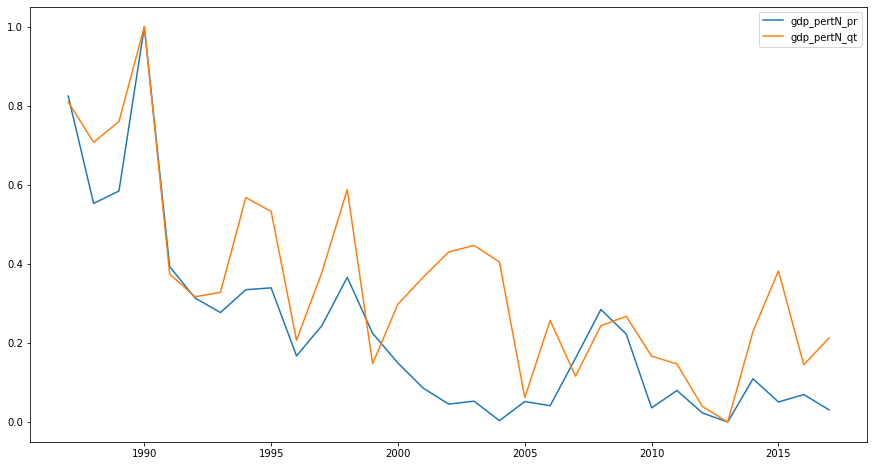

In [185]:
dfperts.plot(y=[x for x in dfperts.columns if x[:3]=='gdp'], figsize=(15, 8))

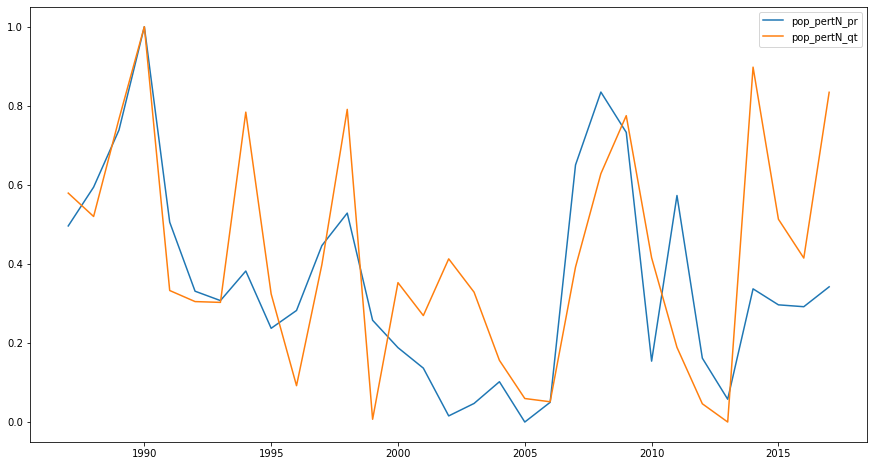

In [186]:
dfperts.plot(y=[x for x in dfperts.columns if x[:3]=='pop'], figsize=(15, 8))

# Normalization in deltas

After discussion, it was concluded that normalizing the deltas' section would be better 

In [21]:
# create a dictionary with global amount of trade
    # quantity = Total imports 
    # mean_val = Average price 

items = df.groupby('Item').groups.keys()
glob_dict = {}            
py = df.groupby('Year')  # py = Per Year 
for year, group in py:
    glob_dict[year] = {}
    for itm in items:
        glob_dict[year][itm] = {}
        glob_dict[year][itm]['quantity'] = group.loc[group['Item']==itm].loc[group['Element']=='Import Quantity']['Value'].sum()
        glob_dict[year][itm]['mean_val'] = group.loc[group['Item']==itm].loc[group['Element']=='Import Value']['Value'].mean()  

norm_dict = {}    # create a new dictionary for normalizing values
for itm in items:
    norm_dict[itm] = {}

    for year in range(1986, 2018):
        norm_dict[itm][year] = {}
        norm_dict[itm][year]['qt'] = glob_dict[year][itm]['quantity']
        norm_dict[itm][year]['vl'] = glob_dict[year][itm]['mean_val']

for itm in items:  # add normalized values to global yearly dictionary 
    dfa = pd.DataFrame(norm_dict[itm]).transpose()
    dfa['nqt'] = nrml(dfa['qt'])
    dfa['nvl'] = nrml(dfa['vl'])
    for year in range(1986, 2018):
        glob_dict[year][itm]['qnt'] = dfa.loc[year]['nqt']
        glob_dict[year][itm]['val'] = dfa.loc[year]['nvl']


In [22]:
for year in range(1987, 2018):  #  Calculate differences of trade values on consecutive years 
    for itm in items:
        glob_dict[year][itm]['delta_qt'] = np.abs(glob_dict[year][itm]['qnt'] - glob_dict[year-1][itm]['qnt'])
        glob_dict[year][itm]['delta_pr'] = np.abs(glob_dict[year][itm]['val'] - glob_dict[year-1][itm]['val'])
        
        
norm_dict2 = {}    # create a dictionary for normalizing delta values
for itm in items:
    norm_dict2[itm] = {}
    for year in range(1987, 2018):
        norm_dict2[itm][year] = {}
        norm_dict2[itm][year]['delta_pr'] = glob_dict[year][itm]['delta_pr']
        norm_dict2[itm][year]['delta_qt'] = glob_dict[year][itm]['delta_qt']


for itm in items:  # add normalized delta values to global yearly dictionary 
    dfa = pd.DataFrame(norm_dict2[itm]).transpose()
    
    dfa['gdp_delta_qt_n'] = norm_gdp(dfa['delta_qt'],case='global')
    dfa['gdp_delta_pr_n'] = norm_gdp(dfa['delta_pr'],case='global')
    dfa['pop_delta_qt_n'] = norm_pop(dfa['delta_qt'],case='global')
    dfa['pop_delta_pr_n'] = norm_pop(dfa['delta_pr'],case='global')
    
    for year in range(1987, 2018):
        
        glob_dict[year][itm]['gdp_pertb_pr'] = dfa.loc[year]['gdp_delta_pr_n']
        glob_dict[year][itm]['gdp_pertb_qt'] = dfa.loc[year]['gdp_delta_qt_n']
        glob_dict[year][itm]['pop_pertb_pr'] = dfa.loc[year]['pop_delta_pr_n']
        glob_dict[year][itm]['pop_pertb_qt'] = dfa.loc[year]['pop_delta_qt_n']
        

In [23]:
for year in range(1987, 2018):  # take yearly mean of perturbation over Item list ...
    glob_dict[year]['gdp_PERTB_pr'] = pd.DataFrame(glob_dict[year]).transpose()['gdp_pertb_pr'].mean()
    glob_dict[year]['gdp_PERTB_qt'] = pd.DataFrame(glob_dict[year]).transpose()['gdp_pertb_qt'].mean()
    glob_dict[year]['pop_PERTB_pr'] = pd.DataFrame(glob_dict[year]).transpose()['pop_pertb_pr'].mean()
    glob_dict[year]['pop_PERTB_qt'] = pd.DataFrame(glob_dict[year]).transpose()['pop_pertb_qt'].mean()


DF = pd.DataFrame(glob_dict).transpose()
DF['gdp_perturb_pr'] = nrml(DF['gdp_PERTB_pr'])  # ... and Normalize them 
DF['gdp_perturb_qt'] = nrml(DF['gdp_PERTB_qt'])
DF['pop_perturb_pr'] = nrml(DF['pop_PERTB_pr'])  # ... and Normalize them 
DF['pop_perturb_qt'] = nrml(DF['pop_PERTB_qt'])

for year in range(1987, 2018):             # Add normalized perturbations values to global dictionary 
    glob_dict[year]['gdp_pertN_pr'] = DF.loc[year]['gdp_perturb_pr']
    glob_dict[year]['gdp_pertN_qt'] = DF.loc[year]['gdp_perturb_qt']
    glob_dict[year]['pop_pertN_pr'] = DF.loc[year]['pop_perturb_pr']
    glob_dict[year]['pop_pertN_qt'] = DF.loc[year]['pop_perturb_qt']

In [24]:
dict_perts = {}    #   Create dictionary and DataFrame for perturbations 
for year in range(1987, 2018):
    dict_perts[year] = {}
    for x in ['gdp_pertN_pr','gdp_pertN_qt','pop_pertN_pr','pop_pertN_qt']:
        dict_perts[year][x] = glob_dict[year][x]
    for itm in items:
        for y in ['gdp_pertb_pr', 'gdp_pertb_qt','pop_pertb_pr','pop_pertb_qt']:
            dict_perts[year][itm+y[-3:]] = glob_dict[year][itm][y]
        

dfperts = pd.DataFrame(dict_perts).transpose()    
dfperts

,gdp_pertN_pr,gdp_pertN_qt,pop_pertN_pr,pop_pertN_qt,Barley_pr,Barley_qt,"Beans, dry_pr","Beans, dry_qt",Chick peas_pr,Chick peas_qt,...,Oats_pr,Oats_qt,Rice - total (Rice milled equivalent)_pr,Rice - total (Rice milled equivalent)_qt,Sorghum_pr,Sorghum_qt,Soybeans_pr,Soybeans_qt,Wheat_pr,Wheat_qt
1987,0.562880,0.819894,0.428609,0.596831,0.035922,0.048437,0.323704,0.255217,0.284198,0.080171,...,0.054174,0.007142,0.032735,0.051738,0.132788,0.122763,0.026888,0.017476,0.080072,0.075746
1988,0.748058,0.565283,0.679628,0.449055,0.001111,0.132975,0.107498,0.039022,0.252354,0.012984,...,0.258891,0.140852,0.179466,0.016463,0.048184,0.064425,0.010581,0.024557,0.249758,0.057627
1989,1.000000,1.000000,0.973850,1.000000,0.147997,0.001296,0.043245,0.077861,0.027243,0.041839,...,0.529300,0.171005,0.158737,0.058985,0.364666,0.326241,0.045225,0.007855,0.222276,0.058503
1990,0.914981,0.845466,0.997181,0.935432,0.117710,0.080501,0.284281,0.123204,0.091534,0.031989,...,0.367133,0.051273,0.208291,0.056269,0.269272,0.208741,0.063876,0.011485,0.275625,0.092769
1991,0.516886,0.404859,0.544196,0.340517,0.009537,0.053207,0.280848,0.012783,0.057822,0.006134,...,0.149718,0.006903,0.027099,0.020011,0.210059,0.011073,0.001600,0.017316,0.164661,0.075862
1992,0.349891,0.482536,0.371625,0.456999,0.131987,0.014163,0.089553,0.076052,0.015709,0.020200,...,0.170271,0.003122,0.002120,0.026083,0.078265,0.110968,0.007946,0.027623,0.029658,0.032792
1993,0.318347,0.388226,0.330781,0.325230,0.052375,0.052799,0.193960,0.118221,0.006550,0.036444,...,0.063192,0.157764,0.080241,0.007485,0.154212,0.102992,0.045414,0.011429,0.021495,0.021487
1994,0.328222,0.670271,0.380593,0.774882,0.067725,0.061767,0.208079,0.159350,0.127880,0.081029,...,0.056334,0.090197,0.234132,0.099886,0.043624,0.055569,0.004710,0.010192,0.109199,0.062088
1995,0.203811,0.301514,0.242855,0.284696,0.045441,0.003152,0.076443,0.060123,0.017313,0.010049,...,0.072081,0.038776,0.117712,0.006217,0.096042,0.152451,0.007168,0.023608,0.032250,0.008592
1996,0.296303,0.212650,0.374787,0.157720,0.137317,0.020493,0.093311,0.024960,0.131459,0.077026,...,0.351345,0.009638,0.123000,0.019679,0.008365,0.118984,0.024023,0.023148,0.173545,0.010683


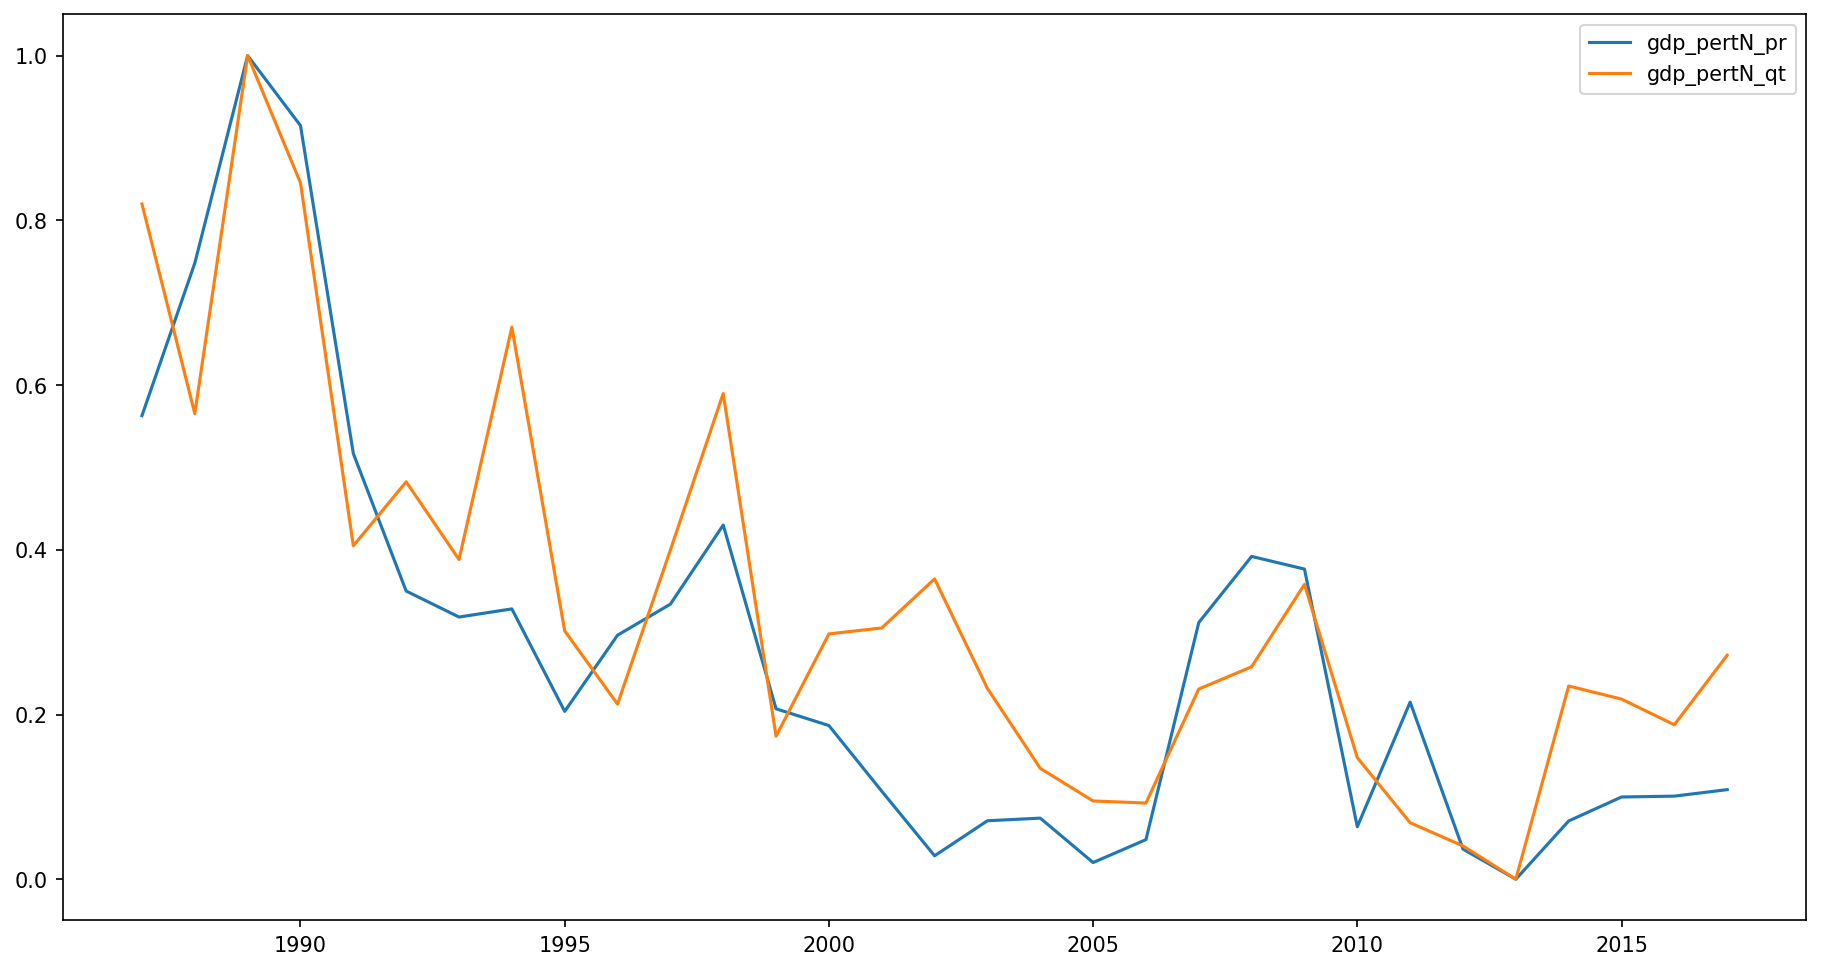

In [25]:
dfperts.plot(y=[x for x in dfperts.columns if x[:3]=='gdp'], figsize=(15, 8))

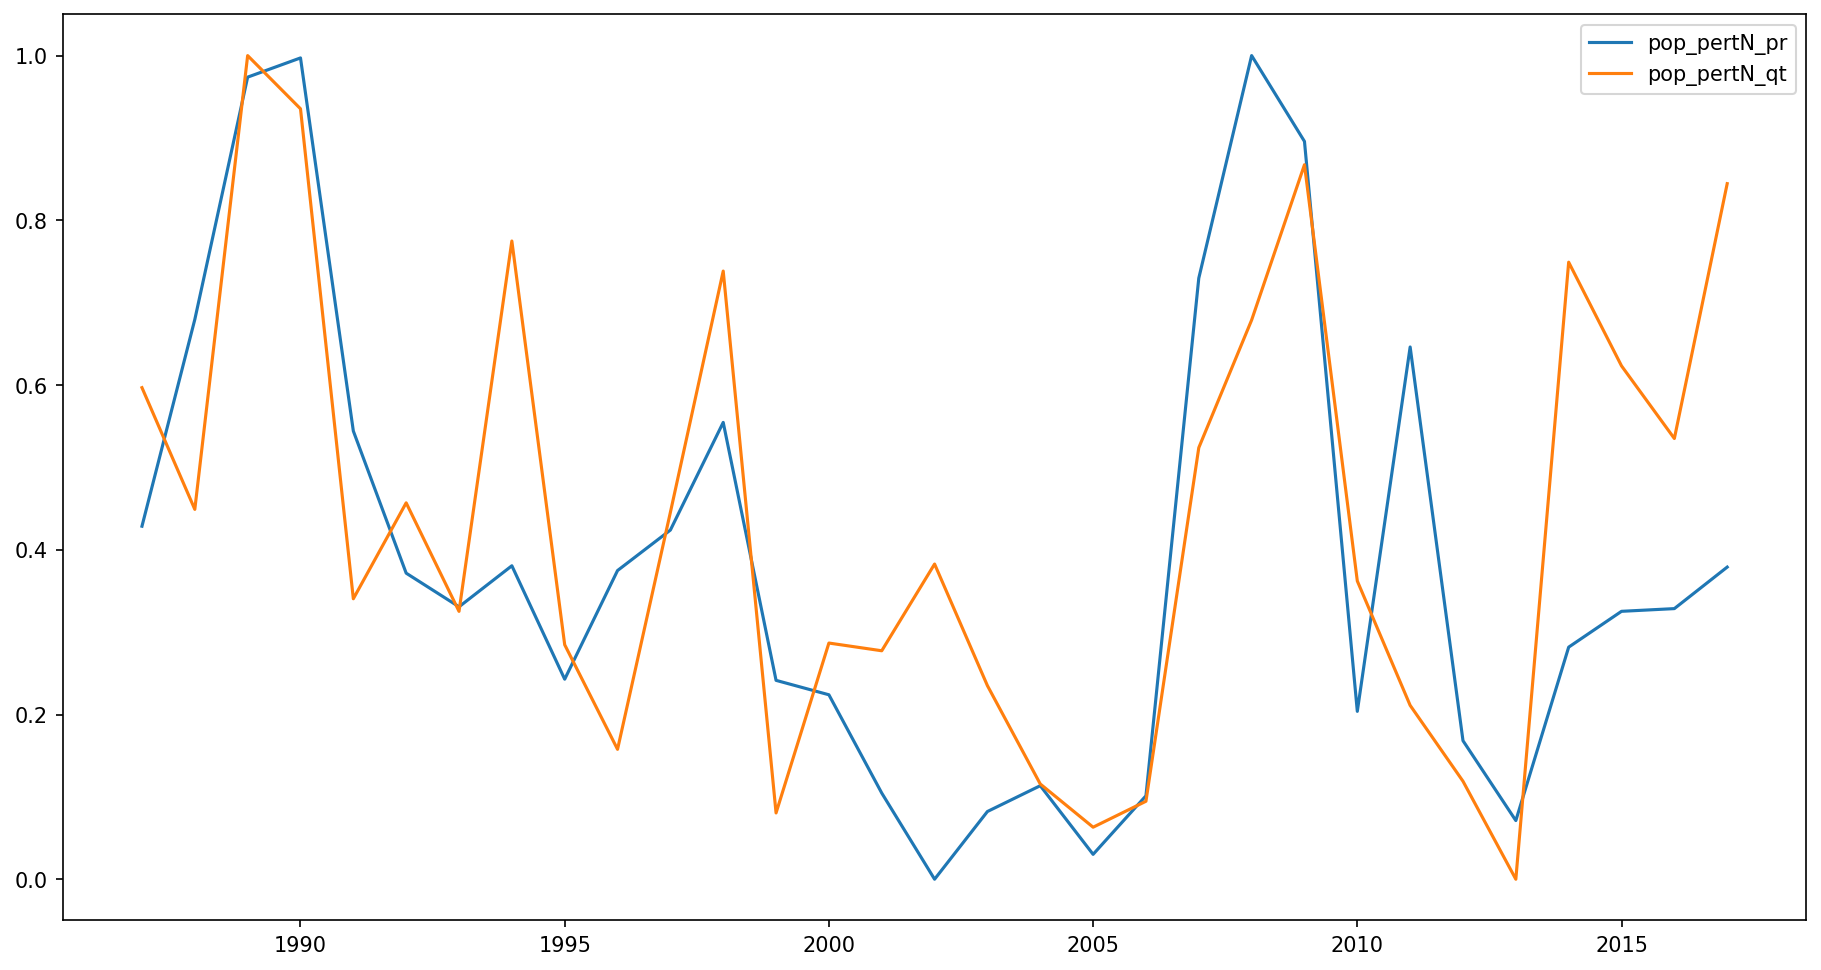

In [26]:
dfperts.plot(y=[x for x in dfperts.columns if x[:3]=='pop'], figsize=(15, 8))

In [15]:
# CONSTRUCTION OF NETWORK 


%matplotlib inline
import networkx as nx
lg = []    #  lg = list of graphs:  a network (graph) for each year
for year in range(1986, 2018):
    G = nx.MultiDiGraph(weighted=True)
    for index, row in df.loc[df['Year']==year].iterrows():
        if row['Element']=='Import Quantity':
            G.add_edge( row['exporter'], row['importer'], row['Item'], weight=row['Value'] )
        else:
            G[row['exporter']][row['importer']][row['Item']]['value'] = row['Value']
    lg += [G]


In [27]:
#  create a dictionary with amount of trade per country
    # quantity = Total imports 
    # mean_val = Average price     
    
items = df.groupby('Item').groups.keys()
dict_country = {}            
pc = df.groupby('Year')  # pc = Per Country 

for name, group in df.groupby('importer'):
    dict_country[name] = {}
    
for name, group in df.groupby('exporter'):
    if name not in dict_country.keys():
        dict_country[name] = {}

year = int(1986)
for G in lg:
    for x in G.nodes():
        dict_country[x][year] = {}
        for y in G.out_edges(x):        
            for key, val in G[y[0]][y[1]].items():
                for k, v in val.items():
                    dict_country[x][year]['exp_'+key+'_'+k] = v
        for y in G.in_edges(x):
            for key, val in G[y[0]][y[1]].items():
                for k, v in val.items():
                    dict_country[x][year]['imp_'+key+'_'+k] = v
    year += 1

KeyError: "Democratic People's Republic of Korea"

In [17]:
def nrml_(a):   # Normalize in [-1,1]
    return 2*(a - a.min()) / (a.max() - a.min()) -1

In [18]:
for key, val in dict_country.items():
    xxx = pd.DataFrame(val).transpose()
    for col in xxx.columns:
        xxx[col] = nrml(xxx[col])
        xxx['dlt_'+col] = xxx[col] - xxx[col].shift(1)
        xxx['dlt_'+col] = nrml_(xxx['dlt_'+col])
    for year in range(1987, 2018):
        try:
            dict_country[key][year]['dlt_in_pr'] = xxx.drop([xc for xc in xxx.columns if 'dlt_imp_' != xc[:8] or '_value' not in xc ], axis=1).transpose()[year].mean()
            dict_country[key][year]['dlt_in_vl'] = xxx.drop([xc for xc in xxx.columns if 'dlt_imp_' != xc[:8] or '_weight' not in xc ], axis=1).transpose()[year].mean()
            dict_country[key][year]['dlt_ex_pr'] = xxx.drop([xc for xc in xxx.columns if 'dlt_exp_' != xc[:8] or '_value' not in xc ], axis=1).transpose()[year].mean()
            dict_country[key][year]['dlt_ex_vl'] = xxx.drop([xc for xc in xxx.columns if 'dlt_exp_' != xc[:8] or '_weight' not in xc ], axis=1).transpose()[year].mean()
        except: 
            print (key, year)

Afghanistan 1988
Algeria 1995
Armenia 1987
Armenia 1988
Armenia 1989
Armenia 1990
Armenia 1991
Armenia 1992
Armenia 1993
Armenia 1994
Armenia 1995
Armenia 1996
Armenia 2003
Aruba 1987
Aruba 1988
Aruba 1989
Aruba 1992
Aruba 2013
Azerbaijan 1987
Azerbaijan 1988
Azerbaijan 1989
Azerbaijan 1990
Azerbaijan 1991
Azerbaijan 1993
Azerbaijan 1994
Azerbaijan 1996
Bahamas, The 1987
Bahamas, The 1988
Bahamas, The 1989
Bahamas, The 1990
Bahamas, The 1991
Bahamas, The 1993
Bahamas, The 1996
Bahrain 1987
Bahrain 1988
Bahrain 1991
Bahrain 1992
Bahrain 1994
Bangladesh 1987
Bangladesh 1988
Bangladesh 1990
Belarus 1987
Belarus 1988
Belarus 1989
Belarus 1990
Belarus 1991
Belgium 1987
Belgium 1988
Belgium 1989
Belgium 1990
Belgium 1991
Belgium 1992
Belgium 1993
Belgium 1994
Belgium 1995
Belgium 1996
Belgium 1997
Belgium 1998
Belgium 1999
Belgium-Luxembourg 2000
Belgium-Luxembourg 2001
Belgium-Luxembourg 2002
Belgium-Luxembourg 2003
Belgium-Luxembourg 2004
Belgium-Luxembourg 2005
Belgium-Luxembourg 2006
Bel

Moldova 1987
Moldova 1988
Moldova 1989
Moldova 1990
Moldova 1991
Mongolia 1987
Mongolia 1989
Mongolia 2009
Montenegro 1987
Montenegro 1988
Montenegro 1989
Montenegro 1990
Montenegro 1991
Montenegro 1992
Montenegro 1993
Montenegro 1994
Montenegro 1995
Montenegro 1996
Montenegro 1997
Montenegro 1998
Montenegro 1999
Montenegro 2000
Montenegro 2001
Montenegro 2002
Montenegro 2003
Montenegro 2004
Montenegro 2005
Montserrat 1987
Montserrat 1988
Montserrat 1989
Montserrat 1990
Montserrat 1991
Montserrat 1992
Montserrat 1993
Montserrat 1994
Montserrat 1995
Montserrat 1996
Montserrat 1997
Montserrat 1998
Montserrat 2006
Montserrat 2007
Montserrat 2010
Montserrat 2011
Montserrat 2012
Namibia 1988
Namibia 1992
Nepal 1992
Nepal 1994
Netherlands Antilles (former) 1987
Netherlands Antilles (former) 1988
Netherlands Antilles (former) 1989
Netherlands Antilles (former) 1990
Netherlands Antilles (former) 1991
Netherlands Antilles (former) 1992
Netherlands Antilles (former) 1993
Netherlands Antilles (fo

Cayman Islands 1999
Cayman Islands 2000
Cayman Islands 2004
Cayman Islands 2008
Cayman Islands 2010
Cayman Islands 2011
Cayman Islands 2013
Cayman Islands 2014
Cayman Islands 2015
Chad 1990
Chad 1991
Chad 1992
Chad 1997
Chad 1998
Chad 2007
Chad 2008
Chad 2011
Chad 2014
Dominican Republic 1987
Dominican Republic 1988
Equatorial Guinea 1987
Equatorial Guinea 1988
Equatorial Guinea 1989
Equatorial Guinea 1990
Equatorial Guinea 1992
Equatorial Guinea 1993
Equatorial Guinea 1994
Equatorial Guinea 1996
Equatorial Guinea 1997
Equatorial Guinea 1998
Equatorial Guinea 2000
Equatorial Guinea 2001
Equatorial Guinea 2002
Equatorial Guinea 2003
Equatorial Guinea 2004
Equatorial Guinea 2005
Equatorial Guinea 2006
Equatorial Guinea 2007
Equatorial Guinea 2009
Equatorial Guinea 2010
Equatorial Guinea 2011
Equatorial Guinea 2012
Equatorial Guinea 2014
Equatorial Guinea 2015
Eritrea 1987
Eritrea 1988
Eritrea 1989
Eritrea 1990
Eritrea 1991
Eritrea 1992
Eritrea 1993
Eritrea 1994
Eritrea 1995
Eritrea 1996


In [19]:
dictotal = {} 
i = 0
j = 0
lp = []
for country in dict_country.keys():
    dictotal[country] = {}
    for year in dict_perts.keys():
        dictotal[country][year] = {}
        try:
            dictotal[country][year]['gdp_af_in_pr'] = -1*dict_country[country][year]['dlt_in_pr'] * dict_perts[year]['gdp_pertN_pr']
            dictotal[country][year]['gdp_af_in_vl'] = -1*dict_country[country][year]['dlt_in_vl'] * dict_perts[year]['gdp_pertN_qt']
            dictotal[country][year]['gdp_af_ex_pr'] = dict_country[country][year]['dlt_ex_pr'] * dict_perts[year]['gdp_pertN_pr']
            dictotal[country][year]['gdp_af_ex_vl'] = dict_country[country][year]['dlt_ex_vl'] * dict_perts[year]['gdp_pertN_qt']
            dictotal[country][year]['gdp_af_in_pr2'] = -1*dict_country[country][year]['dlt_in_pr'] * (dict_perts[year]['gdp_pertN_pr'] + dict_perts[year]['gdp_pertN_qt'])/2
            dictotal[country][year]['gdp_af_in_vl2'] = -1*dict_country[country][year]['dlt_in_vl'] * (dict_perts[year]['gdp_pertN_pr'] + dict_perts[year]['gdp_pertN_qt'])/2
            dictotal[country][year]['gdp_af_ex_pr2'] = dict_country[country][year]['dlt_ex_pr'] * (dict_perts[year]['gdp_pertN_pr'] + dict_perts[year]['gdp_pertN_qt'])/2
            dictotal[country][year]['gdp_af_ex_vl2'] = dict_country[country][year]['dlt_ex_vl'] * (dict_perts[year]['gdp_pertN_pr'] + dict_perts[year]['gdp_pertN_qt'])/2
            
            dictotal[country][year]['pop_af_in_pr'] = -1*dict_country[country][year]['dlt_in_pr'] * dict_perts[year]['pop_pertN_pr']
            dictotal[country][year]['pop_af_in_vl'] = -1*dict_country[country][year]['dlt_in_vl'] * dict_perts[year]['pop_pertN_qt']
            dictotal[country][year]['pop_af_ex_pr'] = dict_country[country][year]['dlt_ex_pr'] * dict_perts[year]['pop_pertN_pr']
            dictotal[country][year]['pop_af_ex_vl'] = dict_country[country][year]['dlt_ex_vl'] * dict_perts[year]['pop_pertN_qt']
            dictotal[country][year]['pop_af_in_pr2'] = -1*dict_country[country][year]['dlt_in_pr'] * (dict_perts[year]['pop_pertN_pr'] + dict_perts[year]['pop_pertN_qt'])/2
            dictotal[country][year]['pop_af_in_vl2'] = -1*dict_country[country][year]['dlt_in_vl'] * (dict_perts[year]['pop_pertN_pr'] + dict_perts[year]['pop_pertN_qt'])/2
            dictotal[country][year]['pop_af_ex_pr2'] = dict_country[country][year]['dlt_ex_pr'] * (dict_perts[year]['pop_pertN_pr'] + dict_perts[year]['pop_pertN_qt'])/2
            dictotal[country][year]['pop_af_ex_vl2'] = dict_country[country][year]['dlt_ex_vl'] * (dict_perts[year]['pop_pertN_pr'] + dict_perts[year]['pop_pertN_qt'])/2
            
        except:
            j += 1
            lp += [country]
        i += 1
print('total loops = ',i, 'total exceptions = ',j)

total loops =  6882 total exceptions =  1485


In [20]:
"""
Compare with: 
 - GDP
 - Total Exports - Total Imports. 
 - resource export - import
 - distance imported, distance exported. 
 - population size  
"""



tk = {}
for key, val in dictotal.items():
    tk[key] = {}
    ddff = pd.DataFrame(val).transpose()
    for col in ddff.columns:
        tk[key][col] = ddff[col].mean()

In [25]:
afs = pd.DataFrame(tk).transpose()
# afs.to_csv('gdp_pop_af_food_trade_percountry.csv')

In [21]:
grc = df.groupby('importer')
for name, group in grc: 
    qt = group.loc[group['Element'] == 'Import Quantity']
    tk[name]['tot_imp_qt'] = np.sum(qt['Value'])
    vl = group.loc[group['Element'] == 'Import Value']
    tk[name]['tot_imp_vl'] = np.sum(vl['Value'])

grc = df.groupby('exporter')
for name, group in grc: 
    qt = group.loc[group['Element'] == 'Import Quantity']
    tk[name]['tot_exp_qt'] = np.sum(qt['Value'])
    vl = group.loc[group['Element'] == 'Import Value']
    tk[name]['tot_exp_vl'] = np.sum(vl['Value'])

# GDP

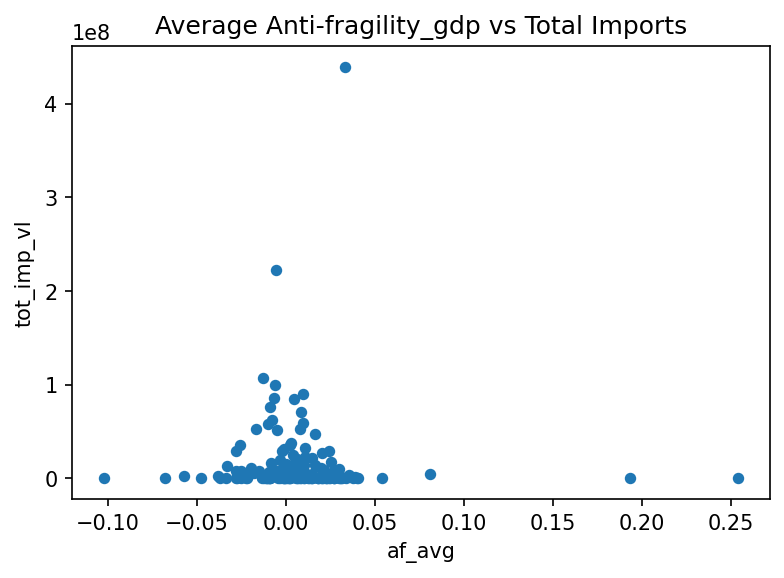

In [30]:
ttk = pd.DataFrame(tk).transpose().drop(['tot_imp_qt', 'tot_imp_vl', 'tot_exp_qt', 'tot_exp_vl'], axis=1)
ttk = ttk[['gdp_af_in_pr', 'gdp_af_in_vl', 'gdp_af_ex_pr', 'gdp_af_ex_vl',
       'gdp_af_in_pr2', 'gdp_af_in_vl2', 'gdp_af_ex_pr2', 'gdp_af_ex_vl2']]

tttk = pd.DataFrame(tk).transpose()
tttk['af_avg'] = ttk.transpose().describe().transpose()['mean']

tttk.plot(kind='scatter', y='tot_imp_vl', x='af_avg', figsize=(6,4), title="Average Anti-fragility_gdp vs Total Imports")

plt.savefig('Average_antifragilityGDP_vsImports.png')

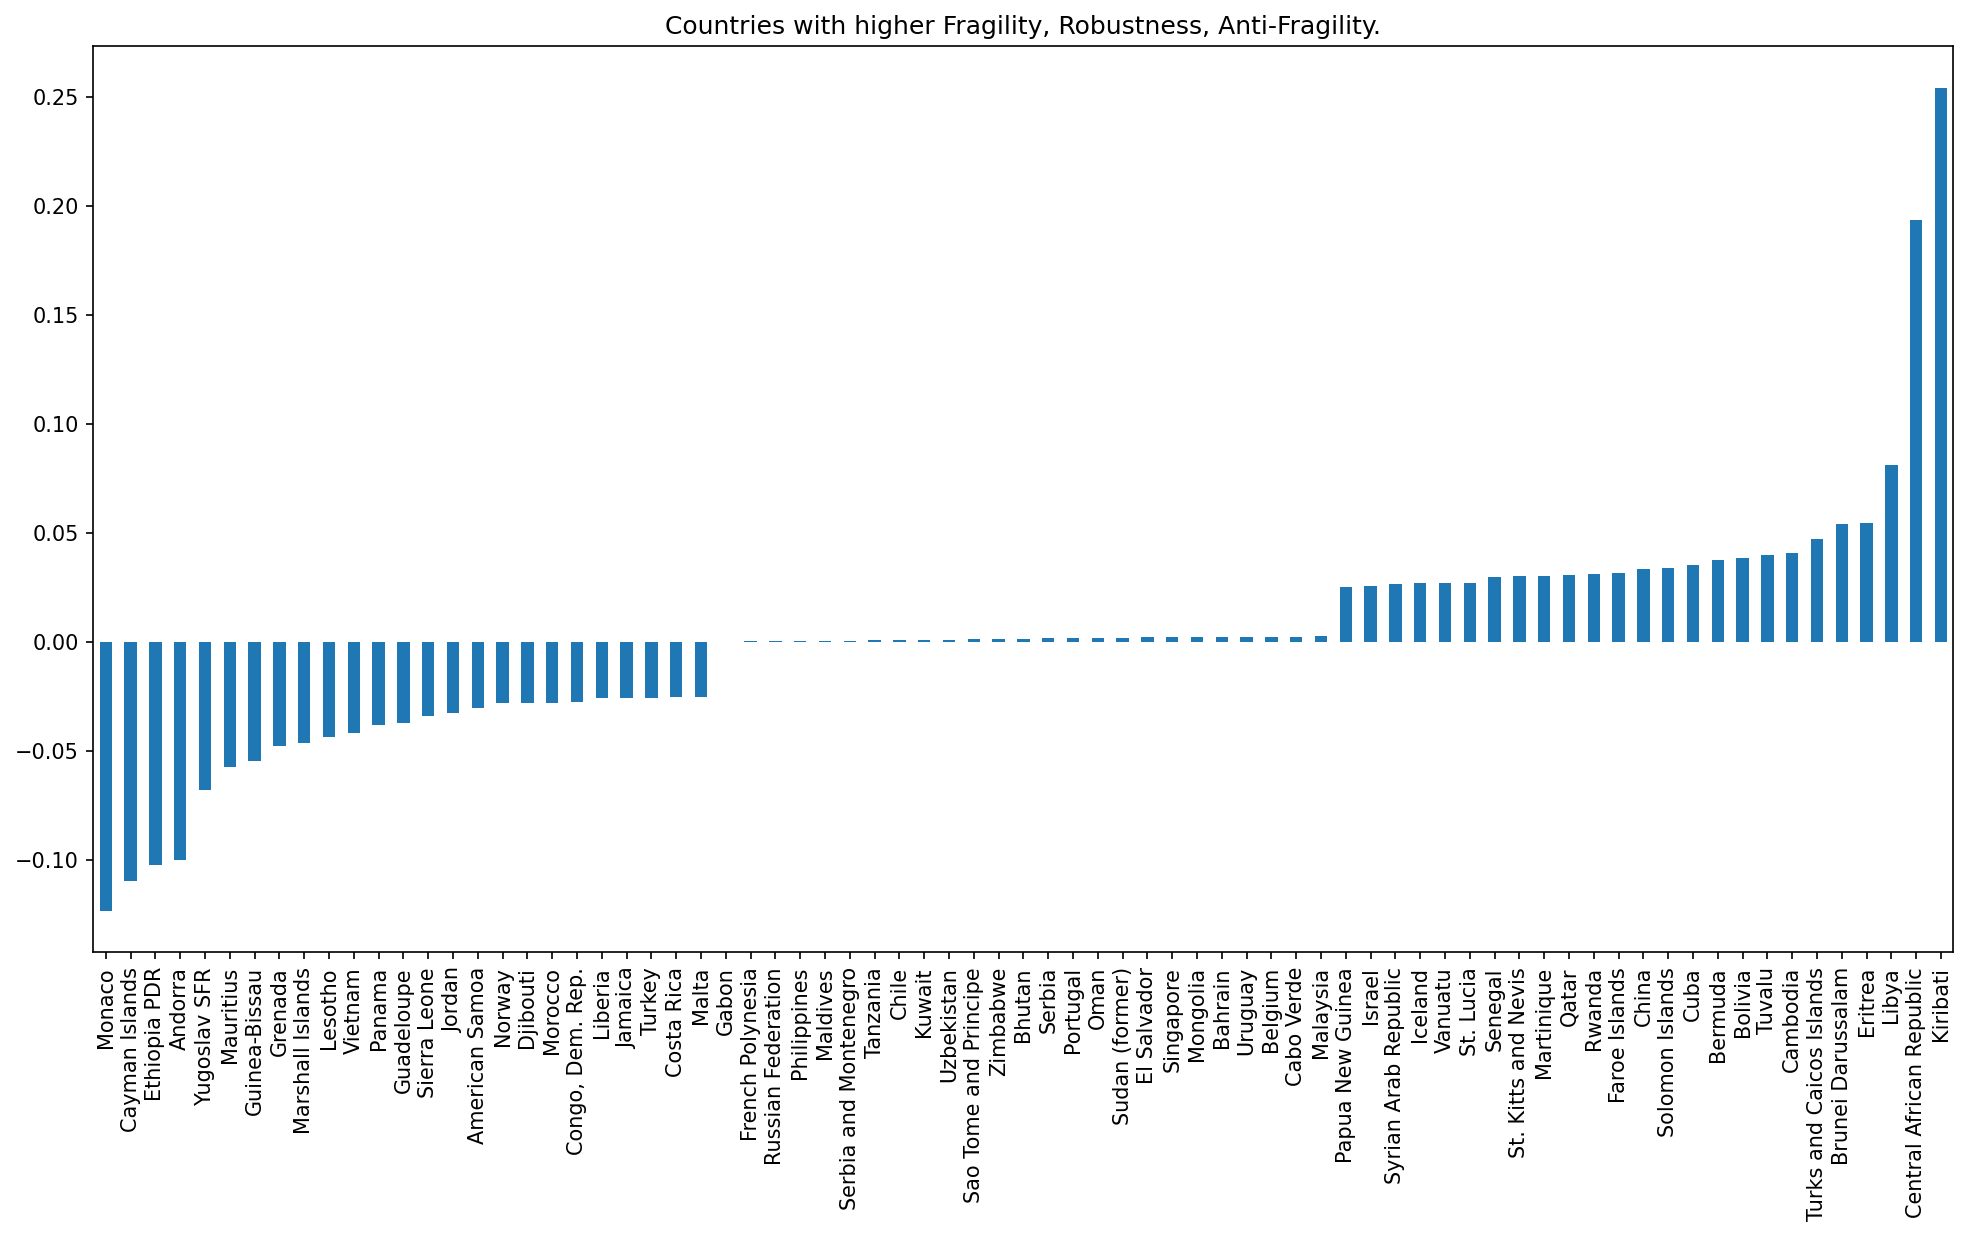

In [31]:
ttk.drop([col for col in ttk.columns if 'in' not in col], axis=1)
top = ttk.transpose().describe().transpose()['mean'].sort_values().head(int(25)) #.plot(kind='bar', figsize=(16,8))
bot = ttk.transpose().describe().transpose()['mean'].dropna().sort_values().tail(int(25)) #.plot(kind='bar', figsize=(16,8))
med = ttk.transpose().describe().transpose()['mean'].abs().sort_values().head(int(25))#.plot(kind='bar', figsize=(16,8))
top.append(med.append(bot)).plot(kind='bar', figsize=(16,8), title="Countries with higher Fragility, Robustness, Anti-Fragility.")

plt.savefig('Higer_countries_FRA_GDP.png')

# POPULATION

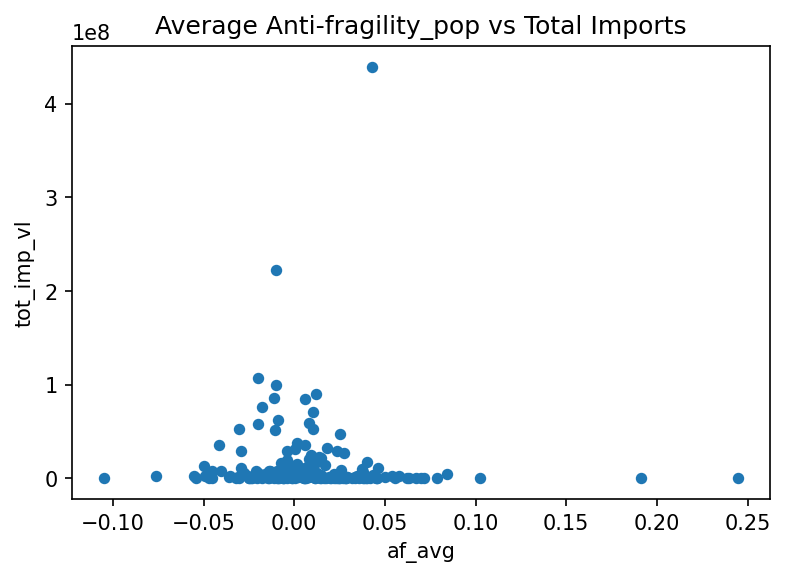

In [32]:
ttk = pd.DataFrame(tk).transpose().drop(['tot_imp_qt', 'tot_imp_vl', 'tot_exp_qt', 'tot_exp_vl'], axis=1)
ttk = ttk[['pop_af_in_pr', 'pop_af_in_vl', 'pop_af_ex_pr', 'pop_af_ex_vl',
       'pop_af_in_pr2', 'pop_af_in_vl2', 'pop_af_ex_pr2', 'pop_af_ex_vl2']]

tttk = pd.DataFrame(tk).transpose()
tttk['af_avg'] = ttk.transpose().describe().transpose()['mean']

tttk.plot(kind='scatter', y='tot_imp_vl', x='af_avg', figsize=(6,4), title="Average Anti-fragility_pop vs Total Imports")

plt.savefig('Average_antifragilityPOP_vsImports.png')

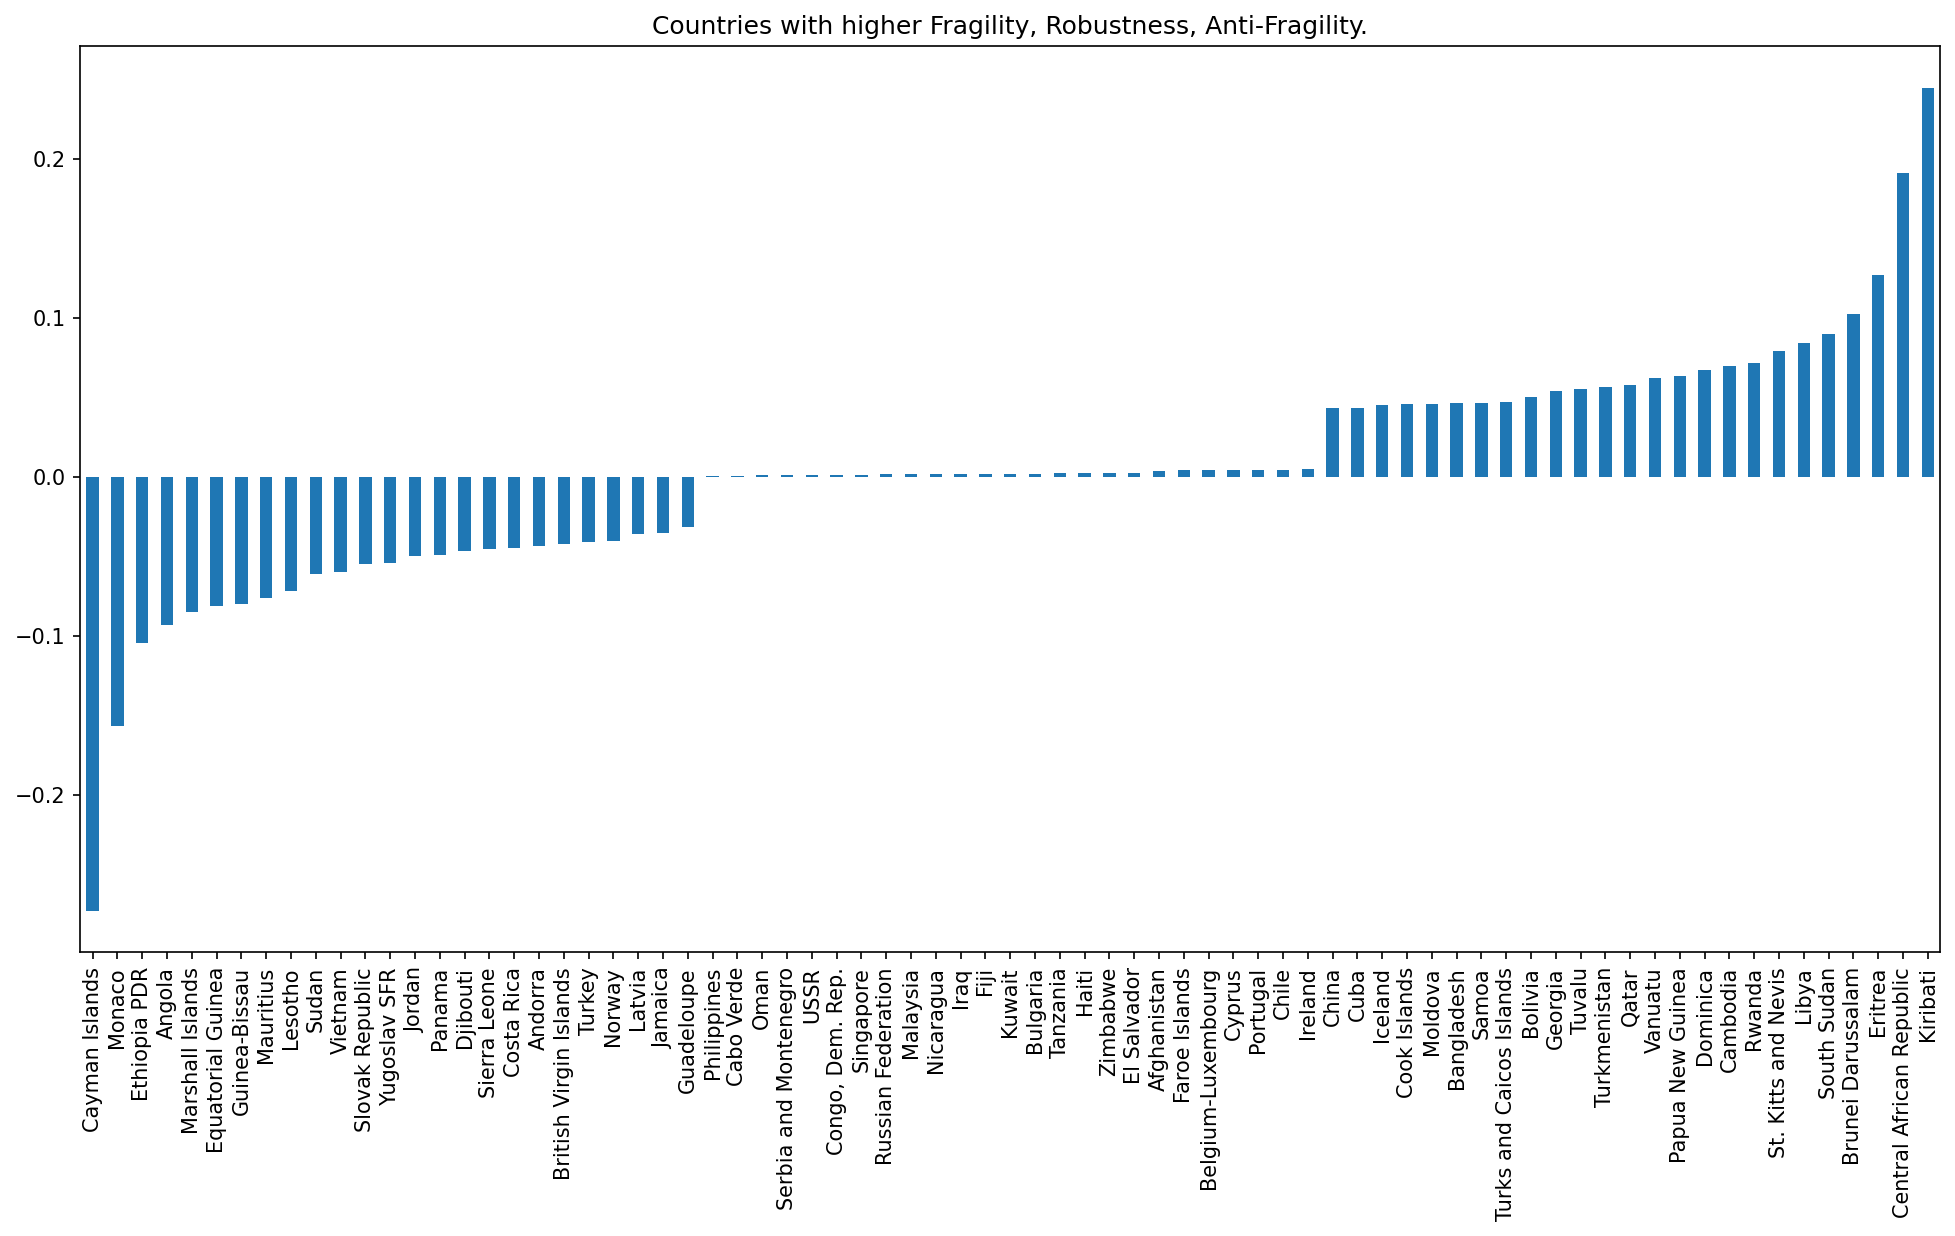

In [33]:
ttk.drop([col for col in ttk.columns if 'in' not in col], axis=1)
top = ttk.transpose().describe().transpose()['mean'].sort_values().head(int(25)) #.plot(kind='bar', figsize=(16,8))
bot = ttk.transpose().describe().transpose()['mean'].dropna().sort_values().tail(int(25)) #.plot(kind='bar', figsize=(16,8))
med = ttk.transpose().describe().transpose()['mean'].abs().sort_values().head(int(25))#.plot(kind='bar', figsize=(16,8))
top.append(med.append(bot)).plot(kind='bar', figsize=(16,8), title="Countries with higher Fragility, Robustness, Anti-Fragility.")

plt.savefig('Higer_countries_FRA_POP.png')